# Scikit Learn API 

In [1]:
import seaborn as sns 
iris=sns.load_dataset('iris')
iris.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


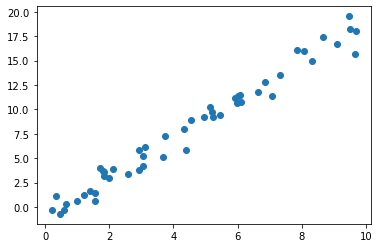

In [2]:
import matplotlib.pyplot as plt
import numpy as np

rng=np.random.RandomState(42)
x=10*rng.rand(50)#단수
y=2*x-1+rng.randn(50)#표준편차 1인
plt.scatter(x,y)

In [5]:
from sklearn.linear_model import LinearRegression #scikit-Learn 기술문서 참조 

In [22]:
model=LinearRegression(fit_intercept=True)#절편 여부 
X=x[:,np.newaxis]
X.shape
model.fit(X,y)
print(model.coef_)#기울기
print(model.intercept_)#절편
print(model.score(X,y))#R2 결정계수 1에 가까운 값을 나타낼 수록 정확도가 높다고 판단

[1.9776566]
-0.9033107255311164
0.9749140085676858


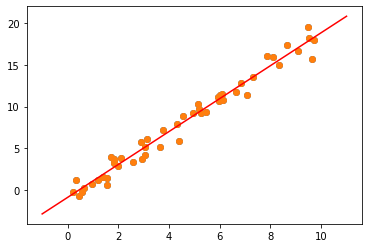

In [24]:
rng=np.random.RandomState(42)#선형회귀
x=10*rng.rand(50)#단수
y=2*x-1+rng.randn(50)#표준편차 1인
plt.scatter(x,y)
xfit=np.linspace(-1,11)
plt.scatter(x,y)
plt.plot(xfit,model.coef_*xfit+model.intercept_,'-r')

#개선방법
#더 복잡하거나 더 유연한 모델
#덜 복잡하거나 덜 유연한 모델
#더 많은 훈련 표본 수집
#각 표본에 특징을 추가하기 위해 더 많은 데이터 수집

# 다항식 회귀모델

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

In [27]:
import numpy as np
def make_data(N,err=1.0,rseed=1):
    rng=np.random.RandomState(rseed)
    X=rng.rand(N)**2
    y=10-1./(X+0.1)
    if err>0:
        y+=err*rng.randn(N)
        return X,y
X,y=make_data(40)

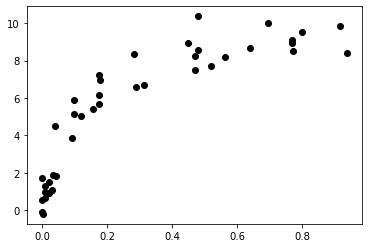

In [28]:
X_test=np.linspace(-0.1,1.1,500)
plt.scatter(X,y,color='black')
axis=plt.axis()

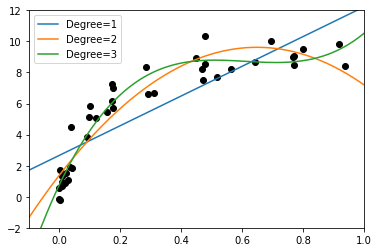

In [30]:
plt.scatter(X,y,color='black')
for degree in [1,2,3]:
    model=PolynomialRegression(degree)
    model.fit(X[:,np.newaxis],y)
    y_test=model.predict(X_test[:,np.newaxis])
    plt.plot(X_test,y_test,label=F'Degree={degree}')
plt.axis([-0.1,1.0,-2,12])
plt.legend(loc='best')

C:\Users\long_\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[1 2 3 4 5 6 7 8 9] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Text(0.5, 0, 'degree')

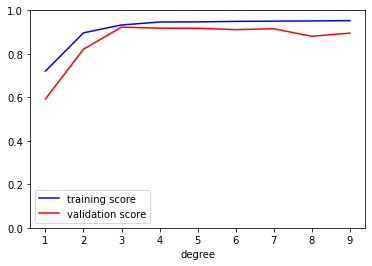

In [31]:
from sklearn.model_selection import validation_curve
degree= np.arange(1,10)
train_score, val_score = validation_curve(PolynomialRegression(),
                                         X[:,np.newaxis],y,'polynomialfeatures__degree',degree,cv=7)
plt.plot(degree,np.median(train_score,1),color='blue',label='training score')
plt.plot(degree,np.median(val_score,1),color='red',label='validation score')
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel('degree')

#3차식 이상부터는 떨어지고 있는 것이 보임! 